# Support Vector Machine (SVM)

## What is Support Vector Machine?

**Support Vector Machine (SVM)** is a powerful supervised machine learning algorithm used for both classification and regression tasks. Developed by Vladimir Vapnik and colleagues in the 1990s, SVM is particularly effective in high-dimensional spaces and is one of the most robust and accurate classification algorithms.

## Key Concepts:

1. **Hyperplane**: A decision boundary that separates different classes in the feature space

2. **Support Vectors**: The data points closest to the hyperplane that influence its position and orientation

3. **Margin**: The distance between the hyperplane and the nearest support vectors from each class

4. **Maximum Margin Classifier**: SVM aims to find the hyperplane that maximizes this margin

5. **Kernel Trick**: A technique to transform data into higher dimensions to make it linearly separable

## How SVM Works:

### For Binary Classification:
1. **Find the Optimal Hyperplane**: Identify the decision boundary that maximizes the margin between two classes
2. **Support Vectors**: The closest points to the hyperplane from both classes become support vectors
3. **Maximize Margin**: The algorithm maximizes the distance between support vectors and hyperplane
4. **Make Predictions**: New data points are classified based on which side of the hyperplane they fall

### For Non-Linear Data:
- Uses **kernel functions** to project data into higher dimensions
- Makes non-linearly separable data linearly separable in higher dimensional space

## Mathematical Foundation:

**Linear SVM Decision Function**:
$$f(x) = w^T x + b$$

Where:
- $w$ is the weight vector (perpendicular to hyperplane)
- $x$ is the input feature vector
- $b$ is the bias term

**Optimization Objective**:
$$\min_{w,b} \frac{1}{2}||w||^2$$

Subject to:
$$y_i(w^T x_i + b) \geq 1, \quad \forall i$$

**Margin**:
$$\text{Margin} = \frac{2}{||w||}$$


## Types of SVM:

1. **Linear SVM**: For linearly separable data
2. **Non-Linear SVM**: Uses kernel trick for complex boundaries
3. **Soft Margin SVM**: Allows some misclassification with parameter C
4. **Hard Margin SVM**: Strictly separates classes (no misclassification allowed)

## Advantages:
- Effective in high-dimensional spaces
- Works well with clear margin of separation
- Memory efficient (uses only support vectors)
- Versatile through different kernel functions
- Robust to overfitting (especially in high dimensions)
- Works well with small to medium-sized datasets
- Global optimal solution (convex optimization)

## Disadvantages:
- Computationally expensive for large datasets
- Sensitive to feature scaling
- Doesn't perform well with noisy data and overlapping classes
- Choosing the right kernel can be challenging
- Difficult to interpret (black box model)
- No probabilistic explanation for classification
- Training time increases with dataset size

## Applications:
- Image classification and recognition
- Text categorization and sentiment analysis
- Handwriting recognition
- Bioinformatics (protein classification)
- Face detection
- Intrusion detection systems
- Medical diagnosis

## Step 1: Import Required Libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.datasets import make_classification, load_breast_cancer, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


## Step 2: Load and Prepare Dataset

We'll use the Breast Cancer dataset for binary classification demonstration.

In [12]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Display dataset information
print("Dataset Information:")
print("="*60)
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names (first 5): {cancer.feature_names[:5]}")
print(f"Target names: {cancer.target_names}")
print(f"Class distribution: {np.bincount(y)}")
print(f"  - Malignant (0): {np.sum(y == 0)}")
print(f"  - Benign (1): {np.sum(y == 1)}")
print("="*60)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Testing class distribution: {np.bincount(y_test)}")

Dataset Information:
Number of samples: 569
Number of features: 30
Feature names (first 5): ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']
Target names: ['malignant' 'benign']
Class distribution: [212 357]
  - Malignant (0): 212
  - Benign (1): 357

Training set size: (398, 30)
Testing set size: (171, 30)
Training class distribution: [148 250]
Testing class distribution: [ 64 107]


## Step 3: Feature Scaling

**Critical for SVM**: Since SVM is sensitive to the scale of features, standardization is essential.

In [13]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Statistics:")
print("="*60)
print("Before scaling:")
print(f"  Train mean (first 5 features): {X_train.mean(axis=0)[:5]}")
print(f"  Train std (first 5 features):  {X_train.std(axis=0)[:5]}")
print("\nAfter scaling:")
print(f"  Train mean (first 5 features): {X_train_scaled.mean(axis=0)[:5]}")
print(f"  Train std (first 5 features):  {X_train_scaled.std(axis=0)[:5]}")
print("="*60)

Feature Scaling Statistics:
Before scaling:
  Train mean (first 5 features): [1.40938467e+01 1.93415327e+01 9.16989447e+01 6.50784171e+02
 9.57892714e-02]
  Train std (first 5 features):  [3.48517093e+00 4.49479978e+00 2.40336307e+01 3.39867408e+02
 1.33323034e-02]

After scaling:
  Train mean (first 5 features): [-4.97480337e-15  2.74863884e-15  2.03912822e-15  1.39921575e-15
  4.32143154e-15]
  Train std (first 5 features):  [1. 1. 1. 1. 1.]


## Step 4: Train Linear SVM Classifier

Let's start with a linear kernel SVM.

In [14]:
# Create Linear SVM classifier
svm_linear = SVC(
    kernel='linear',       # Linear kernel
    C=1.0,                # Regularization parameter
    random_state=42
)

# Train the model
svm_linear.fit(X_train_scaled, y_train)

print("Linear SVM Classifier trained successfully!")
print(f"Kernel: {svm_linear.kernel}")
print(f"C parameter: {svm_linear.C}")
print(f"Number of support vectors: {svm_linear.n_support_}")
print(f"  - Class 0 (Malignant): {svm_linear.n_support_[0]}")
print(f"  - Class 1 (Benign): {svm_linear.n_support_[1]}")
print(f"Total support vectors: {len(svm_linear.support_)}")

Linear SVM Classifier trained successfully!
Kernel: linear
C parameter: 1.0
Number of support vectors: [14 17]
  - Class 0 (Malignant): 14
  - Class 1 (Benign): 17
Total support vectors: 31


## Step 5: Make Predictions and Evaluate (Linear SVM)

In [15]:
# Make predictions
y_train_pred = svm_linear.predict(X_train_scaled)
y_test_pred = svm_linear.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Linear SVM Performance:")
print("="*60)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")
print("="*60)

print("\nClassification Report (Test Set):")
print("="*60)
print(classification_report(y_test, y_test_pred, target_names=cancer.target_names))

Linear SVM Performance:
Training Accuracy: 0.9899
Testing Accuracy:  0.9825

Classification Report (Test Set):
              precision    recall  f1-score   support

   malignant       0.98      0.97      0.98        64
      benign       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## Step 6: Confusion Matrix Visualization

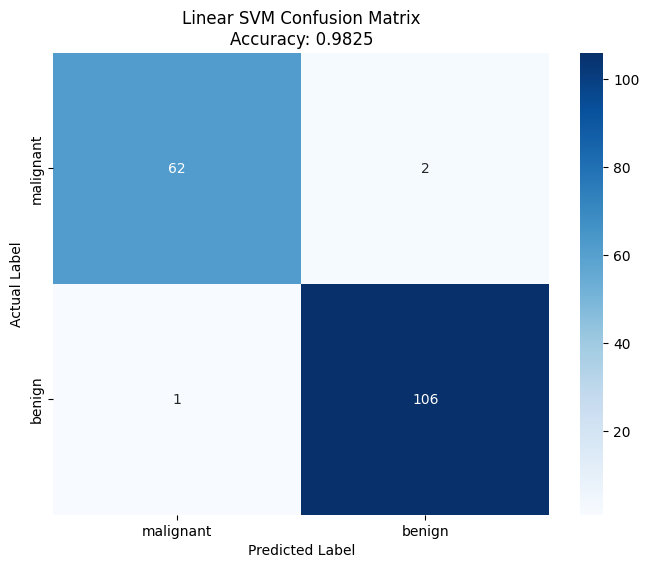

Confusion Matrix - Linear SVM:
[[ 62   2]
 [  1 106]]


In [16]:
# Create confusion matrix
cm_linear = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.title(f'Linear SVM Confusion Matrix\nAccuracy: {test_accuracy:.4f}')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("Confusion Matrix - Linear SVM:")
print(cm_linear)

## Step 7: Effect of C Parameter

The C parameter controls the trade-off between maximizing margin and minimizing classification error.

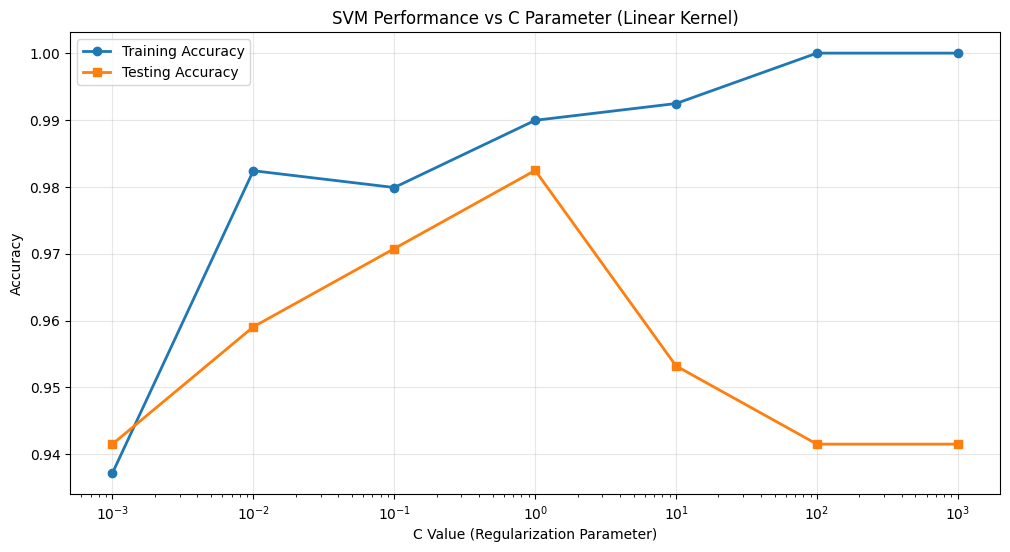

Optimal C value: 1
Best test accuracy: 0.9825

C Parameter Analysis:
------------------------------------------------------------
Small C (e.g., 0.001-0.1):
  - Larger margin, more misclassification allowed
  - More regularization, simpler model
  - Risk of underfitting

Large C (e.g., 100-1000):
  - Smaller margin, fewer misclassifications
  - Less regularization, complex model
  - Risk of overfitting
------------------------------------------------------------


In [17]:
# Test different C values
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for C in C_values:
    svm_temp = SVC(kernel='linear', C=C, random_state=42)
    svm_temp.fit(X_train_scaled, y_train)
    
    train_scores.append(svm_temp.score(X_train_scaled, y_train))
    test_scores.append(svm_temp.score(X_test_scaled, y_test))

# Plot results
plt.figure(figsize=(12, 6))
plt.semilogx(C_values, train_scores, marker='o', label='Training Accuracy', linewidth=2)
plt.semilogx(C_values, test_scores, marker='s', label='Testing Accuracy', linewidth=2)
plt.xlabel('C Value (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('SVM Performance vs C Parameter (Linear Kernel)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find optimal C
optimal_c = C_values[np.argmax(test_scores)]
print(f"Optimal C value: {optimal_c}")
print(f"Best test accuracy: {max(test_scores):.4f}")

print("\nC Parameter Analysis:")
print("-"*60)
print("Small C (e.g., 0.001-0.1):")
print("  - Larger margin, more misclassification allowed")
print("  - More regularization, simpler model")
print("  - Risk of underfitting")
print("\nLarge C (e.g., 100-1000):")
print("  - Smaller margin, fewer misclassifications")
print("  - Less regularization, complex model")
print("  - Risk of overfitting")
print("-"*60)

## Step 8: Comparing Different Kernels

Comparing Different Kernels:
LINEAR Kernel:
  Train Accuracy: 0.9899
  Test Accuracy:  0.9825
  Support Vectors: 31
------------------------------------------------------------
RBF Kernel:
  Train Accuracy: 0.9824
  Test Accuracy:  0.9766
  Support Vectors: 91
------------------------------------------------------------
POLY Kernel:
  Train Accuracy: 0.9070
  Test Accuracy:  0.8947
  Support Vectors: 125
------------------------------------------------------------
SIGMOID Kernel:
  Train Accuracy: 0.9548
  Test Accuracy:  0.9357
  Support Vectors: 57
------------------------------------------------------------

Kernel Comparison Summary:
 Kernel  Train Accuracy  Test Accuracy  Support Vectors
 linear        0.989950       0.982456               31
    rbf        0.982412       0.976608               91
   poly        0.907035       0.894737              125
sigmoid        0.954774       0.935673               57


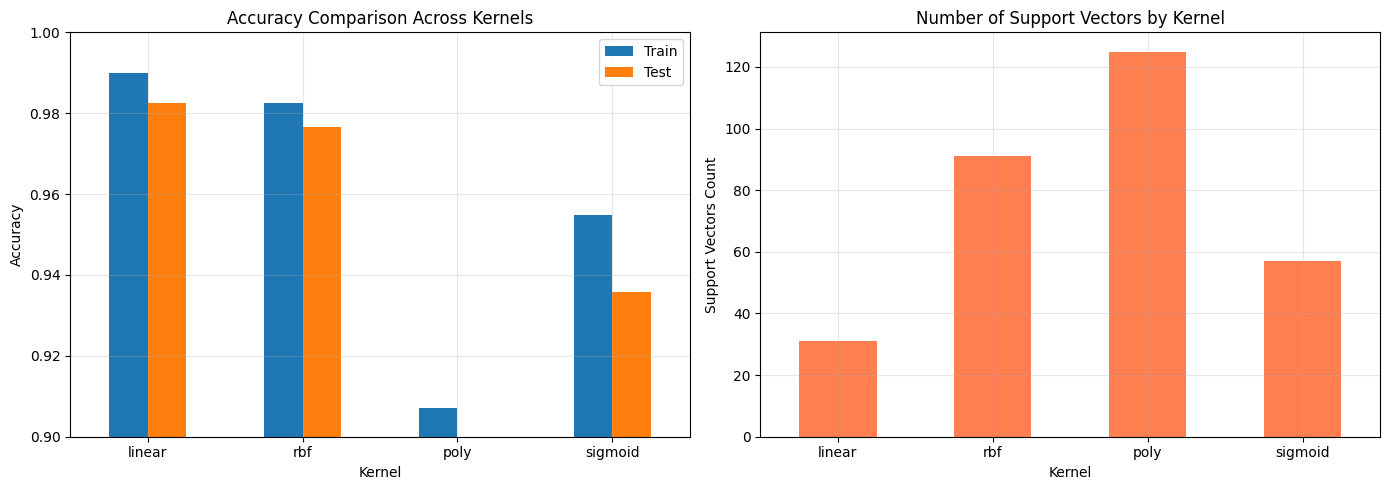

In [18]:
# Compare different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
kernel_results = []

print("Comparing Different Kernels:")
print("="*60)

for kernel in kernels:
    try:
        if kernel == 'poly':
            svm = SVC(kernel=kernel, C=1.0, degree=3, gamma='scale', random_state=42)
        else:
            svm = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
        
        svm.fit(X_train_scaled, y_train)
        train_acc = svm.score(X_train_scaled, y_train)
        test_acc = svm.score(X_test_scaled, y_test)
        
        kernel_results.append({
            'Kernel': kernel,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Support Vectors': len(svm.support_)
        })
        
        print(f"{kernel.upper()} Kernel:")
        print(f"  Train Accuracy: {train_acc:.4f}")
        print(f"  Test Accuracy:  {test_acc:.4f}")
        print(f"  Support Vectors: {len(svm.support_)}")
        print("-"*60)
    except Exception as e:
        print(f"{kernel.upper()} Kernel: Error - {e}")
        print("-"*60)

# Create comparison dataframe
df_kernels = pd.DataFrame(kernel_results)
print("\nKernel Comparison Summary:")
print(df_kernels.to_string(index=False))

# Visualize kernel comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
df_kernels.plot(x='Kernel', y=['Train Accuracy', 'Test Accuracy'], 
                kind='bar', ax=axes[0], rot=0)
axes[0].set_title('Accuracy Comparison Across Kernels')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.9, 1.0])
axes[0].legend(['Train', 'Test'])
axes[0].grid(True, alpha=0.3)

# Support vectors comparison
df_kernels.plot(x='Kernel', y='Support Vectors', kind='bar', 
                ax=axes[1], rot=0, color='coral', legend=False)
axes[1].set_title('Number of Support Vectors by Kernel')
axes[1].set_ylabel('Support Vectors Count')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 9: Hyperparameter Tuning with GridSearchCV

In [19]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly']
}

# Create GridSearchCV
grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Starting GridSearchCV...")
print("="*60)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("\nBest Parameters:")
print("="*60)
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest Cross-Validation Score: {grid_search.best_score_:.4f}")

# Test best model
best_svm = grid_search.best_estimator_
y_test_pred_best = best_svm.predict(X_test_scaled)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

print(f"Best Model Test Accuracy: {test_accuracy_best:.4f}")
print("="*60)

print("\nClassification Report (Best Model):")
print("="*60)
print(classification_report(y_test, y_test_pred_best, target_names=cancer.target_names))

Starting GridSearchCV...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best Parameters:
  C: 0.1
  kernel: linear

Best Cross-Validation Score: 0.9774
Best Model Test Accuracy: 0.9708

Classification Report (Best Model):
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        64
      benign       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## Key Parameters and Best Practices

### Key Parameters in SVM:

- **kernel**: Specifies the kernel type
  - `'linear'`: For linearly separable data
  - `'rbf'`: Most popular, handles non-linear data well
  - `'poly'`: Polynomial kernel, good for image processing
  - `'sigmoid'`: Similar to neural networks

- **C**: Regularization parameter (default=1.0)
  - Small C: Larger margin, more misclassification (soft margin)
  - Large C: Smaller margin, fewer misclassifications (hard margin)
  - Controls bias-variance tradeoff

- **gamma**: Kernel coefficient for 'rbf', 'poly', 'sigmoid'
  - Small gamma: Far away points considered (smooth boundary)
  - Large gamma: Only nearby points considered (complex boundary)
  - `'scale'`: 1 / (n_features * X.var())
  - `'auto'`: 1 / n_features

- **degree**: Degree of polynomial kernel (default=3)

### Best Practices:

1. **Always Scale Features** - Mandatory for SVM!
2. **Start with RBF Kernel** - Generally performs well
3. **Use GridSearchCV** - Find optimal C and gamma
4. **Handle Imbalanced Data** - Use class_weight='balanced'
5. **Consider Training Time** - SVM doesn't scale well to large datasets
6. **Use probability=True** - If you need probability estimates

### Choosing the Right Kernel:

- **Linear**: When you have many features (high-dimensional data)
- **RBF**: General purpose, try this first
- **Polynomial**: For image processing tasks
- **Sigmoid**: Rarely used, similar to neural networks

## Conclusion:

Support Vector Machine is a powerful algorithm that:
- Finds optimal decision boundary by maximizing margin
- Uses support vectors (critical points) for classification
- Transforms data to higher dimensions with kernel trick
- Provides robust performance in high-dimensional spaces
- Requires careful feature scaling and parameter tuning

**Key Insight**: SVM creates the "best" decision boundary by focusing on the hardest-to-classify points (support vectors), ensuring maximum separation between classes!